# Load Libraries and Obtain Datasets

In [ ]:
import os
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.inspection import permutation_importance

from yellowbrick.classifier import ClassificationReport

In [ ]:
# Load y_train, y_val and t_test datasets
y_train = pd.read_excel('y_train.xlsx')['status']
y_val = pd.read_excel('y_val.xlsx')['status']
y_test = pd.read_excel('y_test.xlsx')['status']

# Number of y_train, y_val and y_val
print("Number of Features in y_train: " + str(len(y_train)))
print("Number of Features in y_val: " + str(len(y_val)))
print("Number of Features in y_test: " + str(len(y_test)))

Number of Features in y_train: 7968
Number of Features in y_val: 1708
Number of Features in y_test: 1708


In [ ]:
# Using full dataset (76 final features - same across X_train, X_val, X_test)

# drop irrelevant columns
X_train = pd.read_excel('X_train_without_missing.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_val = pd.read_excel('X_val_without_missing.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_test = pd.read_excel('X_test_without_missing.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)

# Number of Features
print("Number of Features in Full Dataset: " + str(len(X_train.columns)))
print("Number of Features in Full Dataset: " + str(len(X_val.columns)))
print("Number of Features in Full Dataset: " + str(len(X_test.columns)))

Number of Features in Full Dataset: 76
Number of Features in Full Dataset: 76
Number of Features in Full Dataset: 76


In [ ]:
# Using ANOVA datasets (30 final features - same across X_train_ANOVA, X_val_ANOVA and X_val_anova)

# drop irrelevant columns
X_train_anova = pd.read_excel('X_train_ANOVA.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_val_anova = pd.read_excel('X_val_ANOVA.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_test_anova = pd.read_excel('X_test_ANOVA.xlsx').drop(['Unnamed: 0','url', 'words_raw'], axis=1)

# Number of Features
print("Number of Features in ANOVA Dataset: " + str(len(X_train_anova.columns)))
print("Number of Features in ANOVA Dataset: " + str(len(X_val_anova.columns)))
print("Number of Features in ANOVA Dataset: " + str(len(X_test_anova.columns)))

Number of Features in ANOVA Dataset: 30
Number of Features in ANOVA Dataset: 30
Number of Features in ANOVA Dataset: 30


In [ ]:
# Using embeddings dataset (500 final features - same across X_train_with_embeddings, X_val_with_embeddings, X_test_with_embeddings)

# load datasets
X_train_embedded = pd.read_excel('X_train_with_embeddings.xlsx')
X_val_embedded = pd.read_excel('X_val_with_embeddings.xlsx')
X_test_embedded = pd.read_excel('X_test_with_embeddings.xlsx')

# convert columns with numerical names to string type
X_train_embedded.columns = X_train_embedded.columns.astype(str)
X_val_embedded.columns = X_val_embedded.columns.astype(str)
X_test_embedded.columns = X_test_embedded.columns.astype(str)

# Drop irrelevant columns
X_train_embedded = X_train_embedded.drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_val_embedded = X_val_embedded.drop(['Unnamed: 0','url', 'words_raw'], axis=1)
X_test_embedded = X_test_embedded.drop(['Unnamed: 0','url', 'words_raw'], axis=1)

# Number of Features
print("Number of Features in Embeddings Dataset: " + str(len(X_train_embedded.columns)))
print("Number of Features in Embeddings Dataset: " + str(len(X_val_embedded.columns)))
print("Number of Features in Embeddings Dataset: " + str(len(X_test_embedded.columns)))

Number of Features in Embeddings Dataset: 500
Number of Features in Embeddings Dataset: 500
Number of Features in Embeddings Dataset: 500


In [ ]:
# Use encoded dataset (16 final features - same across X_train_encoded, X_val_encoded, X_test_encoded)

# Drop irrelevant columns
X_train_encoded = pd.read_excel('X_train_encoded.xlsx').drop(['Unnamed: 0'], axis=1)
X_val_encoded = pd.read_excel('X_val_encoded.xlsx').drop(['Unnamed: 0'], axis=1)
X_test_encoded = pd.read_excel('X_test_encoded.xlsx').drop(['Unnamed: 0'], axis=1)

# Number of Features
print("Number of Features in Encoded Dataset: " + str(len(X_train_encoded.columns)))
print("Number of Features in Encoded Dataset: " + str(len(X_val_encoded.columns)))
print("Number of Features in Encoded Dataset: " + str(len(X_test_encoded.columns)))

Number of Features in Encoded Dataset: 16
Number of Features in Encoded Dataset: 16
Number of Features in Encoded Dataset: 16


In [ ]:
# Use embeddings encoded dataset (32 final features - same across X_train_embeddings_encoded, X_val_embeddings_encoded, X_test_embeddings_encoded)

# Drop irrelevant columns
X_train_embeddings_encoded = pd.read_excel('X_train_embeddings_encoded.xlsx').drop(['Unnamed: 0'], axis=1)
X_val_embeddings_encoded = pd.read_excel('X_val_embeddings_encoded.xlsx').drop(['Unnamed: 0'], axis=1)
X_test_embeddings_encoded = pd.read_excel('X_test_embeddings_encoded.xlsx').drop(['Unnamed: 0'], axis=1)

# Number of Features
print("Number of Features in Embeddings Encoded Dataset: " + str(len(X_train_embeddings_encoded.columns)))
print("Number of Features in Embeddings Encoded Dataset: " + str(len(X_val_embeddings_encoded.columns)))
print("Number of Features in Embeddings Encoded Dataset: " + str(len(X_test_embeddings_encoded.columns)))

Number of Features in Embeddings Encoded Dataset: 32
Number of Features in Embeddings Encoded Dataset: 32
Number of Features in Embeddings Encoded Dataset: 32


# Simple MLP

# All Features

## Model Training with **all** Features

### Model Training with **two** hidden layers

Accuracy on Training Data: 0.95
Precision on Training Data: 0.95
Recall on Training Data: 0.96
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.95      0.94      0.95       860
           1       0.94      0.95      0.94       848

    accuracy                           0.94      1708
   macro avg       0.94      0.94      0.94      1708
weighted avg       0.94      0.94      0.94      1708

[[811  49]
 [ 45 803]]


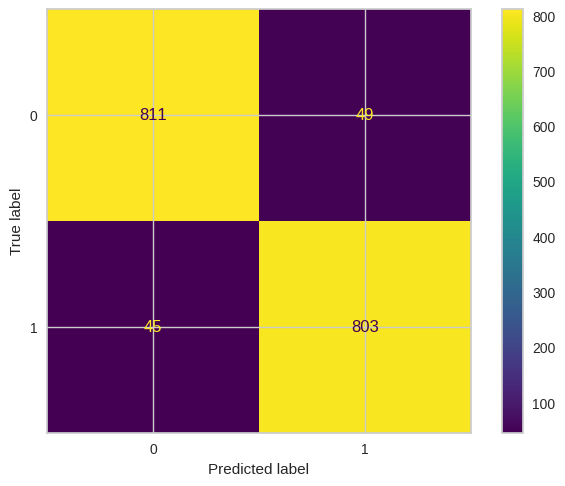

In [ ]:
# build model
mlp2layers_all = MLPClassifier(hidden_layer_sizes=(64, 32), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_all.fit(X_train, y_train)

# predict with training data
mlp2layersAll_train_pred = mlp2layers_all.predict(X_train)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp2layersAll_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersAll_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersAll_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersAll_train_pred)))


## classification report for X_val predictions
# Predict with X_val
mlp2layers_all_pred = mlp2layers_all.predict(X_val)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_all_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_all_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_all_pred)
plt.show()

### Model Training with **three** hidden layers

Accuracy on Training Data: 0.95
Precision on Training Data: 0.96
Recall on Training Data: 0.95
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       860
           1       0.95      0.94      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708

[[820  40]
 [ 49 799]]


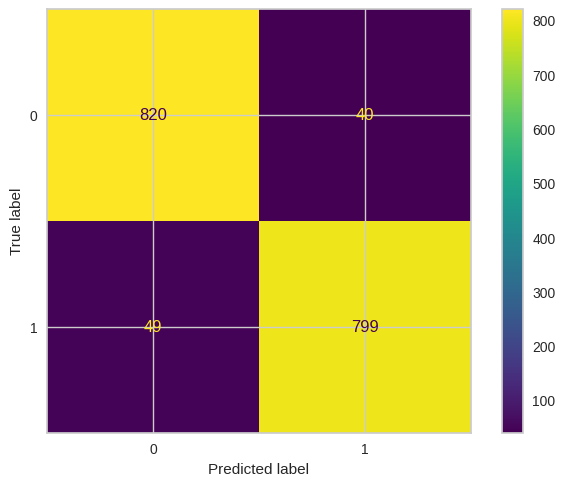

In [ ]:
# build model
mlp3layers_all = MLPClassifier(hidden_layer_sizes=(64, 32, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_all.fit(X_train, y_train)

# predict with training data
mlp3layersAll_train_pred = mlp3layers_all.predict(X_train)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersAll_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp3layersAll_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersAll_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersAll_train_pred)))


## classification report for X_val predictions
# Predict with X_val
mlp3layers_all_pred = mlp3layers_all.predict(X_val)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_all_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_all_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_all_pred)
plt.show()

## Hyperparameter Tuning (**all** features)
> Tune models `mlp2layers_all` and `mlp3layers_all` with **all** features

### Tune `mlp2layers_all` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32), (64, 32), (64, 52), (52, 52), (52, 32), (52, 16)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp2layers_all_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_all_tuned = RandomizedSearchCV(estimator=mlp2layers_all_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_all_tuned = mlp2layers_all_tuned.fit(X_train, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_all_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_all_tuned.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters:  {'max_iter': 300, 'hidden_layer_sizes': (52, 16), 'alpha': 0.001, 'activation': 'relu'}
CV:  0.9565750801969678


### Tune `mlp3layers_all` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (64, 32, 32), (64, 52, 52), (64, 52, 32), (64, 52, 16), (52, 32, 16)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_all_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_all_tuned = RandomizedSearchCV(estimator=mlp3layers_all_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_all_tuned = mlp3layers_all_tuned.fit(X_train, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_all_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_all_tuned.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 300, 'hidden_layer_sizes': (64, 52, 32), 'alpha': 0.01, 'activation': 'relu'}
CV:  0.9549684915613508


## Prediction with Validation Data (**all** features)

### Prediction with `mlp2layers_all_tuned` model

In [ ]:
# Predict with X_val
mlp2layersAll_pred = mlp2layers_all_tuned.predict(X_val)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersAll_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       860
           1       0.96      0.95      0.96       848

    accuracy                           0.96      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



[[825  35]
 [ 41 807]]


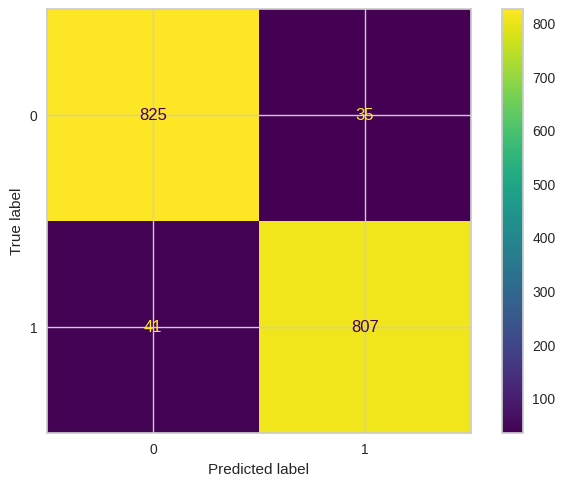

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersAll_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersAll_pred)
plt.show()

### Prediction with `mlp3layers_all_tuned` model

In [ ]:
# Predict with X_val
mlp3layersAll_pred = mlp3layers_all_tuned.predict(X_val)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersAll_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       860
           1       0.98      0.94      0.96       848

    accuracy                           0.96      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



[[840  20]
 [ 48 800]]


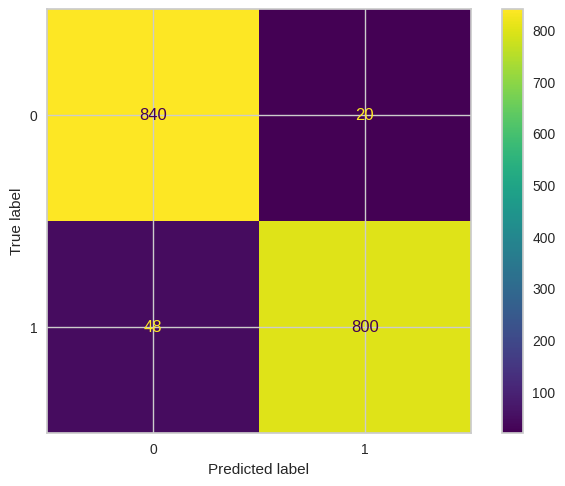

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersAll_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersAll_pred)
plt.show()

## Model Training with Permutation Importance
* Perform Permutation Importance with first full models `mlp2layers_all` and `mlp3layers_all` to get respective feature importance in each model.
* Permutation Importance works by shuffling values of features into different rows, while keeping the remaining features and target variables the same while this random permutation occurs. Assess features that are significant/important when data is disturbed, resulting in decrease in model performance.

In [ ]:
# MLP Classifier from previous section with full models
# 2 layers: mlp2layers_all
# 3 layers: mlp3layers_all

### Model Training with **two** hidden layers
* 22 selected features with permutation importance: ['nb_hyphens', 'nb_at', 'nb_qm', 'nb_underscore', 'nb_slash', 'nb_semicolumn', 'nb_www', 'https_token', 'ratio_digits_host', 'nb_subdomains', 'shortening_service', 'longest_words_raw', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extMedia', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank']



#### Feature Importance Selection

In [ ]:
# Compute permutation importance
results_2layers = permutation_importance(mlp2layers_all, X_train, y_train, n_repeats=30, random_state=42)

# Display feature importance
for i in results_2layers.importances_mean.argsort()[::-1]:
    feature_name = X_train.columns[i]
    print(f"Feature {i} ({feature_name}): {results_2layers.importances_mean[i]:.3f} +/- {results_2layers.importances_std[i]:.3f}")

Feature 74 (google_index): 0.061 +/- 0.002
Feature 50 (nb_hyperlinks): 0.040 +/- 0.002
Feature 75 (page_rank): 0.038 +/- 0.002
Feature 17 (nb_www): 0.037 +/- 0.002
Feature 44 (phish_hints): 0.028 +/- 0.002
Feature 52 (ratio_extHyperlinks): 0.011 +/- 0.001
Feature 3 (nb_hyphens): 0.010 +/- 0.001
Feature 71 (domain_age): 0.010 +/- 0.002
Feature 23 (ratio_digits_host): 0.008 +/- 0.001
Feature 51 (ratio_intHyperlinks): 0.006 +/- 0.001
Feature 5 (nb_qm): 0.006 +/- 0.001
Feature 40 (longest_words_raw): 0.004 +/- 0.001
Feature 4 (nb_at): 0.004 +/- 0.001
Feature 67 (domain_in_title): 0.004 +/- 0.001
Feature 14 (nb_semicolumn): 0.003 +/- 0.001
Feature 72 (web_traffic): 0.003 +/- 0.001
Feature 21 (https_token): 0.003 +/- 0.001
Feature 32 (shortening_service): 0.003 +/- 0.001
Feature 7 (nb_underscore): 0.003 +/- 0.001
Feature 29 (nb_subdomains): 0.002 +/- 0.001
Feature 60 (ratio_extMedia): 0.002 +/- 0.001
Feature 10 (nb_slash): 0.002 +/- 0.001
Feature 1 (ip): 0.002 +/- 0.001
Feature 46 (brand_in_

In [ ]:
## Select features that are relatively significant (with mean importances > threshold), and to be used for training later

# Get index of selected features
perm_threshold = 0.002 # determined after several iterations and striking balance between good amount of features and interpretability and simplicity
selected_perm_features_index_2layers = np.where(results_2layers.importances_mean >= perm_threshold)[0]

# Get the names of the selected features
selected_perm_features_2layers = [X_train.columns[i] for i in selected_perm_features_index_2layers]
print('Number of Selected Features:' + str(len(selected_perm_features_2layers)))
print(selected_perm_features_2layers)

# Subset X datasets with selected features
X_train_perm_2layers = X_train[selected_perm_features_2layers]
X_val_perm_2layers = X_val[selected_perm_features_2layers]
X_test_perm_2layers = X_test[selected_perm_features_2layers]

Number of Selected Features:22
['nb_hyphens', 'nb_at', 'nb_qm', 'nb_underscore', 'nb_slash', 'nb_semicolumn', 'nb_www', 'https_token', 'ratio_digits_host', 'nb_subdomains', 'shortening_service', 'longest_words_raw', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extMedia', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank']


Accuracy on Training Data: 0.94
Precision on Training Data: 0.94
Recall on Training Data: 0.95
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.94      0.94      0.94       860
           1       0.94      0.94      0.94       848

    accuracy                           0.94      1708
   macro avg       0.94      0.94      0.94      1708
weighted avg       0.94      0.94      0.94      1708

[[806  54]
 [ 52 796]]


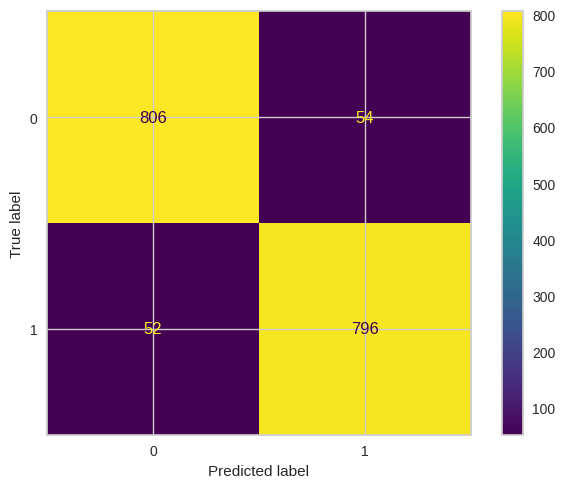

In [ ]:
## Retrain model with selected features
# build model
mlp2layers_perm = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_perm.fit(X_train_perm_2layers, y_train)

# predict with training data
mlp2layersPerm_train_pred = mlp2layers_perm.predict(X_train_perm_2layers)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp2layersPerm_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersPerm_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersPerm_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersPerm_train_pred)))

## classification report for X_val_perm_2layers predictions
# Predict with X_val_perm_2layers
mlp2layers_perm_pred = mlp2layers_perm.predict(X_val_perm_2layers)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_perm_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_perm_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_perm_pred)
plt.show()

### Model Training with **three** hidden layers
* 24 selected features with permutation importance: ['nb_hyphens', 'nb_at', 'nb_qm', 'nb_underscore', 'nb_slash', 'nb_semicolumn', 'nb_www', 'https_token', 'ratio_digits_host', 'nb_subdomains', 'shortening_service', 'shortest_word_host', 'longest_words_raw', 'longest_word_host', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'safe_anchor', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank']



#### Feature Importance Selection

In [ ]:
# Compute permutation importance
results_3layers = permutation_importance(mlp3layers_all, X_train, y_train, n_repeats=30, random_state=42)

# Display feature importance
for i in results_3layers.importances_mean.argsort()[::-1]:
    feature_name = X_train.columns[i]
    print(f"Feature {i} ({feature_name}): {results_3layers.importances_mean[i]:.3f} +/- {results_3layers.importances_std[i]:.3f}")

Feature 74 (google_index): 0.060 +/- 0.002
Feature 50 (nb_hyperlinks): 0.045 +/- 0.002
Feature 75 (page_rank): 0.040 +/- 0.002
Feature 17 (nb_www): 0.039 +/- 0.002
Feature 44 (phish_hints): 0.030 +/- 0.002
Feature 52 (ratio_extHyperlinks): 0.015 +/- 0.002
Feature 3 (nb_hyphens): 0.012 +/- 0.001
Feature 71 (domain_age): 0.011 +/- 0.001
Feature 23 (ratio_digits_host): 0.008 +/- 0.001
Feature 51 (ratio_intHyperlinks): 0.007 +/- 0.001
Feature 5 (nb_qm): 0.006 +/- 0.001
Feature 40 (longest_words_raw): 0.005 +/- 0.001
Feature 21 (https_token): 0.004 +/- 0.001
Feature 4 (nb_at): 0.004 +/- 0.001
Feature 67 (domain_in_title): 0.004 +/- 0.001
Feature 29 (nb_subdomains): 0.004 +/- 0.001
Feature 7 (nb_underscore): 0.004 +/- 0.001
Feature 32 (shortening_service): 0.003 +/- 0.001
Feature 14 (nb_semicolumn): 0.003 +/- 0.001
Feature 72 (web_traffic): 0.003 +/- 0.001
Feature 10 (nb_slash): 0.002 +/- 0.001
Feature 63 (safe_anchor): 0.002 +/- 0.001
Feature 38 (shortest_word_host): 0.002 +/- 0.001
Feature

In [ ]:
## Select features that are relatively significant (with mean importances > threshold), and to be used for training later

# Get index of selected features
perm_threshold = 0.002 # determined after several iterations and striking balance between good amount of features and interpretability and simplicity
selected_perm_features_index_3layers = np.where(results_3layers.importances_mean >= perm_threshold)[0]

# Get the names of the selected features
selected_perm_features_3layers = [X_train.columns[i] for i in selected_perm_features_index_3layers]
print('Number of Selected Features:' + str(len(selected_perm_features_3layers)))
print(selected_perm_features_3layers)

# Subset X datasets with selected features
X_train_perm_3layers = X_train[selected_perm_features_3layers]
X_val_perm_3layers = X_val[selected_perm_features_3layers]
X_test_perm_3layers = X_test[selected_perm_features_3layers]

Number of Selected Features:24
['nb_hyphens', 'nb_at', 'nb_qm', 'nb_underscore', 'nb_slash', 'nb_semicolumn', 'nb_www', 'https_token', 'ratio_digits_host', 'nb_subdomains', 'shortening_service', 'shortest_word_host', 'longest_words_raw', 'longest_word_host', 'phish_hints', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'safe_anchor', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank']


Accuracy on Training Data: 0.95
Precision on Training Data: 0.95
Recall on Training Data: 0.95
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       860
           1       0.95      0.95      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708

[[814  46]
 [ 45 803]]


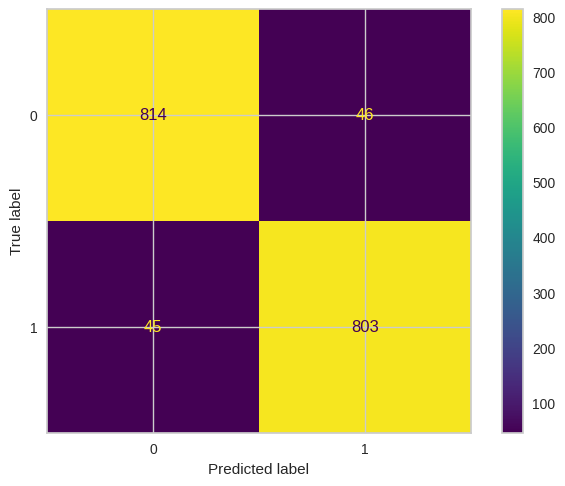

In [ ]:
## Retrain model with selected features
# build model
mlp3layers_perm = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_perm.fit(X_train_perm_3layers, y_train)

# predict with training data
mlp3layersPerm_train_pred = mlp3layers_perm.predict(X_train_perm_3layers)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersPerm_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp3layersPerm_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersPerm_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersPerm_train_pred)))


## classification report for X_val_perm_3layers predictions
# Predict with X_val_perm_3layers
mlp3layers_perm_pred = mlp3layers_perm.predict(X_val_perm_3layers)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_perm_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_perm_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_perm_pred)
plt.show()

## Hyperparameter Tuning (Permutation Importance)

### Tune `mlp2layers_perm` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32), (32, 16), (16, 16), (16, 8)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'logistic'],
    'max_iter': [200, 300, 400],
}

mlp2layers_perm_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_perm_tuned = RandomizedSearchCV(estimator=mlp2layers_perm_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_perm_tuned = mlp2layers_perm_tuned.fit(X_train_perm_2layers, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_perm_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_perm_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 200, 'hidden_layer_sizes': (64, 32), 'alpha': 0.01, 'activation': 'relu'}
CV:  0.9461804268742149


### Tune `mlp3layers_perm` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (32, 16, 16), (16, 16, 8), (16, 8, 8), (32, 16, 8)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_perm_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_perm_tuned = RandomizedSearchCV(estimator=mlp3layers_perm_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_perm_tuned = mlp3layers_perm_tuned.fit(X_train_perm_3layers, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_perm_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_perm_tuned.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 200, 'hidden_layer_sizes': (32, 16, 8), 'alpha': 0.01, 'activation': 'relu'}
CV:  0.9485349265856184


## Prediction with Validation Data (**selected features** from Permutation Importance)

### Prediction with `mlp2layers_perm_tuned` model

In [ ]:
# Predict with X_val_perm_2layers
mlp2layersPerm_pred = mlp2layers_perm_tuned.predict(X_val_perm_2layers)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersPerm_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       860
           1       0.94      0.94      0.94       848

    accuracy                           0.94      1708
   macro avg       0.94      0.94      0.94      1708
weighted avg       0.94      0.94      0.94      1708



[[813  47]
 [ 54 794]]


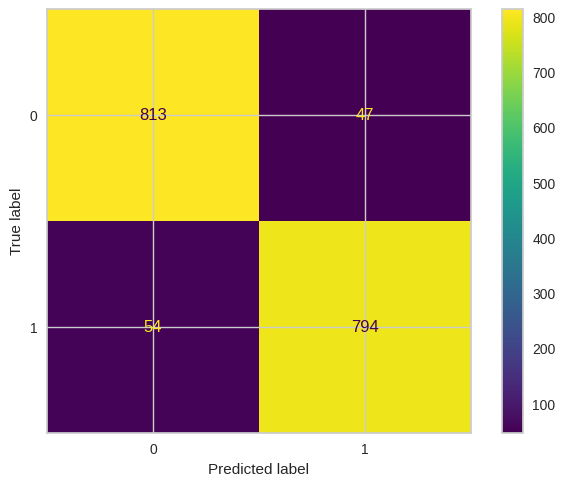

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersPerm_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersPerm_pred)
plt.show()

### Prediction with `mlp3layers_perm_tuned` model

In [ ]:
# Predict with X_val_perm_3layers
mlp3layersPerm_pred = mlp3layers_perm_tuned.predict(X_val_perm_3layers)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersPerm_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       860
           1       0.96      0.94      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708



[[824  36]
 [ 51 797]]


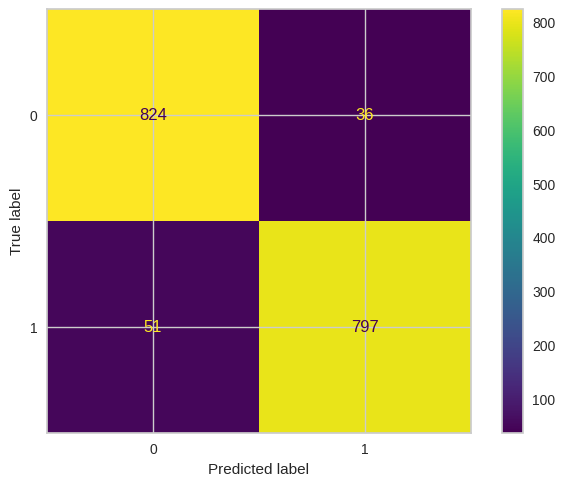

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersPerm_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersPerm_pred)
plt.show()

# ANOVA

## Model Training with **Selected ANOVA** Features

### Model Training with **two** hidden layers

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Training Data: 0.95
Precision on Training Data: 0.94
Recall on Training Data: 0.95
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       860
           1       0.92      0.94      0.93       848

    accuracy                           0.93      1708
   macro avg       0.93      0.93      0.93      1708
weighted avg       0.93      0.93      0.93      1708

[[794  66]
 [ 47 801]]


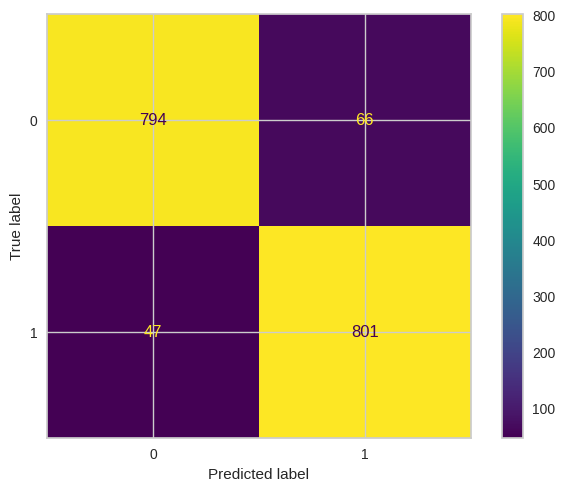

In [ ]:
# build model
mlp2layers_anova = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_anova.fit(X_train_anova, y_train)

# predict with training data
mlp2layersAnova_train_pred = mlp2layers_anova.predict(X_train_anova)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp2layersAnova_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersAnova_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersAnova_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersAnova_train_pred)))

## classification report for X_val_anova predictions
# Predict with X_val_anova
mlp2layers_anova_pred = mlp2layers_anova.predict(X_val_anova)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_anova_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_anova_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_anova_pred)
plt.show()

### Model Training with **three** hidden layers

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Training Data: 0.95
Precision on Training Data: 0.94
Recall on Training Data: 0.95
F1 score on Training Data: 0.95
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       860
           1       0.93      0.95      0.94       848

    accuracy                           0.94      1708
   macro avg       0.94      0.94      0.94      1708
weighted avg       0.94      0.94      0.94      1708

[[798  62]
 [ 45 803]]


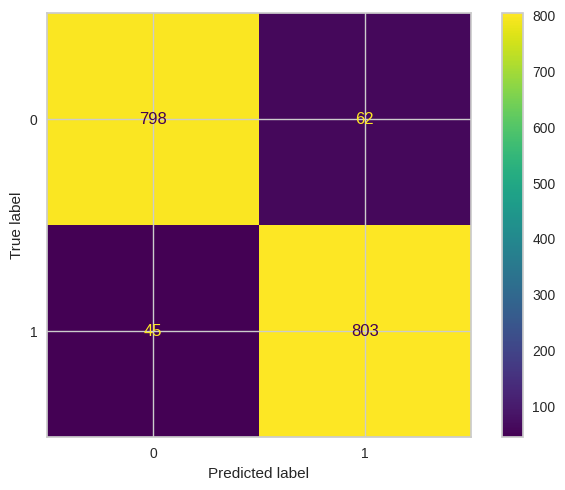

In [ ]:
# build model
mlp3layers_anova = MLPClassifier(hidden_layer_sizes=(32, 16, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_anova.fit(X_train_anova, y_train)

# predict with training data
mlp3layersAnova_train_pred = mlp3layers_anova.predict(X_train_anova)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersAnova_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp3layersAnova_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersAnova_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersAnova_train_pred)))

## classification report for X_val_anova predictions
# Predict with X_val_anova
mlp3layers_anova_pred = mlp3layers_anova.predict(X_val_anova)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_anova_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_anova_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_anova_pred)
plt.show()

## Hyperparameter Tuning (**selected ANOVA** features)
> Tune models `mlp2layers_anova` and `mlp3layers_anova` with **selected ANOVA** features

### Tune `mlp2layers_anova` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32), (32, 16), (32, 21), (21, 21), (21, 16), (16, 16)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp2layers_anova_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_anova_tuned = RandomizedSearchCV(estimator=mlp2layers_anova_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_anova_tuned = mlp2layers_anova_tuned.fit(X_train_anova, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_anova_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_anova_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 400, 'hidden_layer_sizes': (64, 32), 'alpha': 0.01, 'activation': 'relu'}
CV:  0.948048003398122


### Tune `mlp3layers_anova` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (32, 16, 16), (32, 21, 16), (21, 21, 16), (32, 21, 21), (64, 32, 21)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_anova_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_anova_tuned = RandomizedSearchCV(estimator=mlp3layers_anova_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_anova_tuned = mlp3layers_anova_tuned.fit(X_train_anova, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_anova_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_anova_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 200, 'hidden_layer_sizes': (64, 32, 21), 'alpha': 0.0001, 'activation': 'relu'}
CV:  0.9516424574956268


## Prediction with Validation Data (**selected ANOVA** features)

### Prediction with `mlp2layers_anova_tuned` model

In [ ]:
# Predict with X_val_anova
mlp2layersAnova_pred = mlp2layers_anova_tuned.predict(X_val_anova)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersAnova_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96       860
           1       0.96      0.96      0.96       848

    accuracy                           0.96      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



[[823  37]
 [ 36 812]]


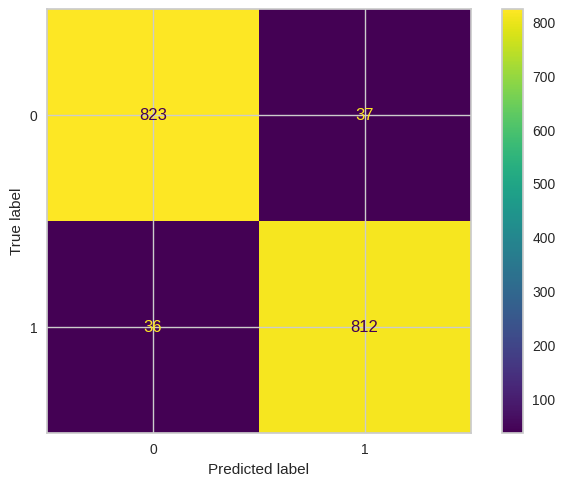

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersAnova_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersAnova_pred)
plt.show()

### Prediction with `mlp3layers_anova_tuned` model

In [ ]:
# Predict with X_val_anova
mlp3layersAnova_pred = mlp3layers_anova_tuned.predict(X_val_anova)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersAnova_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       860
           1       0.96      0.95      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708



[[827  33]
 [ 45 803]]


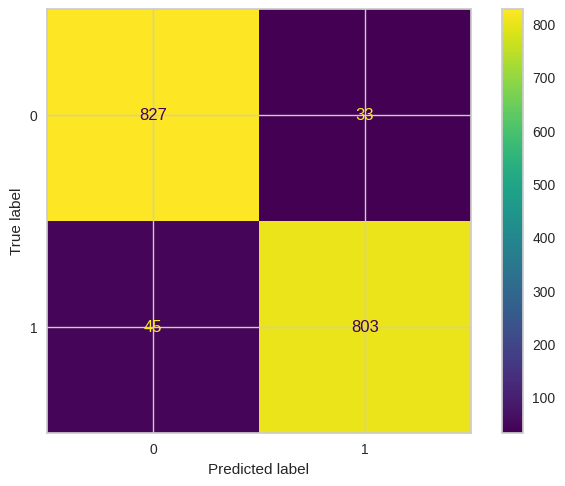

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersAnova_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersAnova_pred)
plt.show()

# Embeddings

## Model Training with **Embeddings**

### Model Training with **two** hidden layers

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy score: 0.99
Precision on Training Data: 0.99
Recall on Training Data: 0.99
F1 score on Training Data: 0.99
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       860
           1       0.96      0.94      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708

[[827  33]
 [ 47 801]]


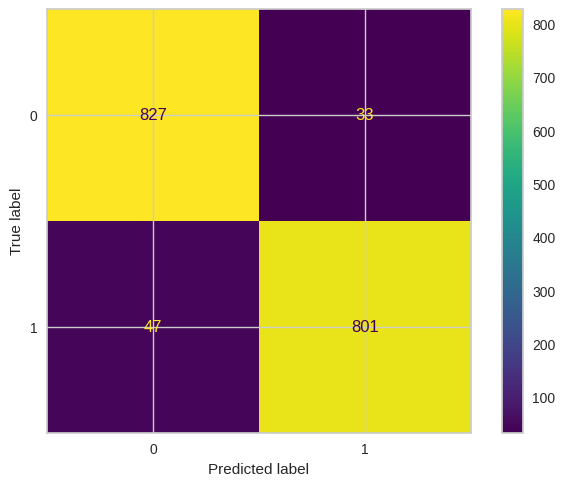

In [ ]:
# build model
mlp2layers_embed = MLPClassifier(hidden_layer_sizes=(128, 64), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_embed.fit(X_train_embedded, y_train)

# predict with training data
mlp2layersEmbed_train_pred = mlp2layers_embed.predict(X_train_embedded)
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, mlp2layersEmbed_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersEmbed_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersEmbed_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersEmbed_train_pred)))

## classification report for X_val_embedded predictions
# Predict with X_val_embedded
mlp2layers_embed_pred = mlp2layers_embed.predict(X_val_embedded)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_embed_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_embed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_embed_pred)
plt.show()

### Model Training with **three** hidden layers

Accuracy on Training Data: 0.99
Precision score: 1.00
Recall on Training Data: 0.99
F1 score on Training Data: 0.99
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       860
           1       0.95      0.94      0.94       848

    accuracy                           0.94      1708
   macro avg       0.95      0.94      0.94      1708
weighted avg       0.95      0.94      0.94      1708

[[821  39]
 [ 55 793]]


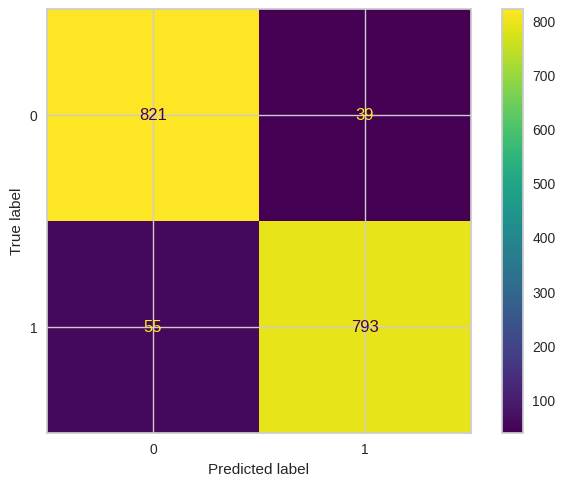

In [ ]:
# build model
mlp3layers_embed = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_embed.fit(X_train_embedded, y_train)

# predict with training data
mlp3layersEmbed_train_pred = mlp3layers_embed.predict(X_train_embedded)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersEmbed_train_pred)))
print("Precision score: {:.2f}". format(precision_score(y_train, mlp3layersEmbed_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersEmbed_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersEmbed_train_pred)))

## classification report for X_val_embedded predictions
# Predict with X_val_embedded
mlp3layers_embed_pred = mlp3layers_embed.predict(X_val_embedded)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_embed_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_embed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_embed_pred)
plt.show()

## Hyperparameter Tuning (with **Embeddings**)
> Tune models `mlp2layers_embed` and `mlp3layers_embed` with **Embeddings**

### Tune `mlp2layers_embed` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(256, 128), (128, 64), (64, 32), (334, 256), (334, 128), (334, 334)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp2layers_embed_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_embed_tuned = RandomizedSearchCV(estimator=mlp2layers_embed_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_embed_tuned = mlp2layers_embed_tuned.fit(X_train_embedded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_embed_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_embed_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 200, 'hidden_layer_sizes': (256, 128), 'alpha': 0.001, 'activation': 'relu'}
CV:  0.9559562258738199


### Tune `mlp3layers_embed` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(256, 128, 64), (128, 64, 32), (334, 256, 128), (334, 128, 32), (334, 128, 64), (128, 64, 16)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_embed_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_embed_tuned = RandomizedSearchCV(estimator=mlp3layers_embed_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_embed_tuned = mlp3layers_embed_tuned.fit(X_train_embedded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_embed_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_embed_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters:  {'max_iter': 300, 'hidden_layer_sizes': (334, 256, 128), 'alpha': 0.0001, 'activation': 'relu'}
CV:  0.9563537705245848


## Prediction with Validation Data (**embeddings** features)

### Prediction with `mlp2layers_embed_tuned` model

In [ ]:
# Predict with X_val_embedded
mlp2layersEmbed_pred = mlp2layers_embed_tuned.predict(X_val_embedded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersEmbed_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       860
           1       0.97      0.96      0.96       848

    accuracy                           0.96      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



[[831  29]
 [ 36 812]]


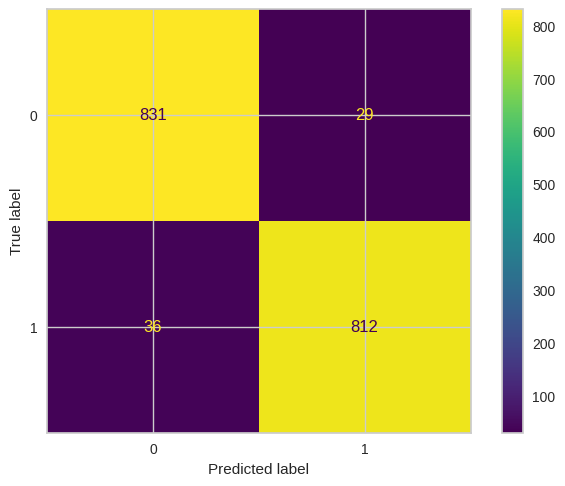

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersEmbed_pred)
plt.show()

### Prediction with `mlp3layers_embed_tuned` model

In [ ]:
# Predict with X_val_embedded
mlp3layersEmbed_pred = mlp3layers_embed_tuned.predict(X_val_embedded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersEmbed_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       860
           1       0.97      0.95      0.96       848

    accuracy                           0.96      1708
   macro avg       0.96      0.96      0.96      1708
weighted avg       0.96      0.96      0.96      1708



[[833  27]
 [ 42 806]]


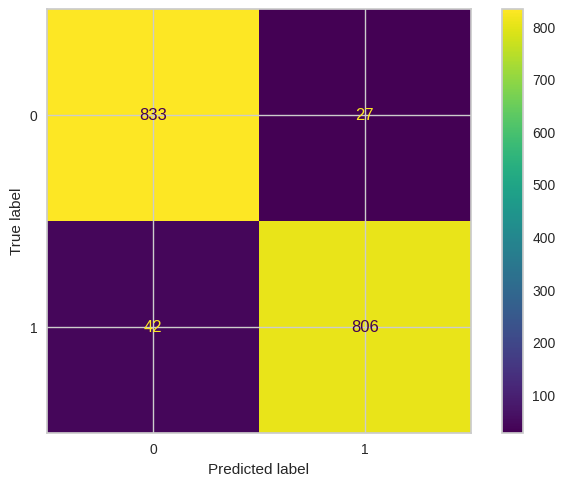

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersEmbed_pred)
plt.show()

## Model Training with Permutation Importance
* Perform Permutation Importance with first full models `mlp2layers_embed` and `mlp3layers_embed` to get respectove feature importance in each model.
* Permutation Importance works by shuffling values of features into different rows, while keeping the remaining features and target variables the same while this random permutation occurs. Assess features that are significant/important when data is disturbed, resulting in decrease in model performance.

In [ ]:
# MLP Classifier from previous section with full models
# 2 layers: mlp2layers_embed
# 3 layers: mlp3layers_embed

### Model Training with **two** hidden layers
* 79 selected features with permutation importance: ['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash', 'nb_www', 'https_token', 'ratio_digits_host', 'tld_in_subdomain', 'shortening_service', 'nb_redirection', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'phish_hints', 'domain_in_brand', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extErrors', 'empty_title', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank', '359', '368', '371', '372', '373', '374', '375', '377', '378', '379', '380', '381', '382', '383', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '421', '422', '423']
* Columns with numerical features above are the compressed feature representations by the encoder in our EDA.


#### Feature Importance Selection

In [ ]:
# Compute permutation importance
results_2layers_embed = permutation_importance(mlp2layers_embed, X_train_embedded, y_train, n_repeats=10, random_state=42)

# Display feature importance
for i in results_2layers_embed.importances_mean.argsort()[::-1]:
    feature_name = X_train_embedded.columns[i]
    print(f"Feature {i} ({feature_name}): {results_2layers_embed.importances_mean[i]:.3f} +/- {results_2layers_embed.importances_std[i]:.3f}")

Feature 491 (415): 0.079 +/- 0.002
Feature 487 (411): 0.076 +/- 0.001
Feature 17 (nb_www): 0.063 +/- 0.002
Feature 495 (419): 0.059 +/- 0.001
Feature 497 (421): 0.053 +/- 0.002
Feature 476 (400): 0.049 +/- 0.002
Feature 75 (page_rank): 0.044 +/- 0.001
Feature 481 (405): 0.043 +/- 0.002
Feature 480 (404): 0.042 +/- 0.002
Feature 469 (393): 0.040 +/- 0.001
Feature 485 (409): 0.040 +/- 0.002
Feature 74 (google_index): 0.036 +/- 0.003
Feature 473 (397): 0.035 +/- 0.001
Feature 483 (407): 0.034 +/- 0.001
Feature 471 (395): 0.033 +/- 0.001
Feature 499 (423): 0.031 +/- 0.001
Feature 467 (391): 0.030 +/- 0.001
Feature 50 (nb_hyperlinks): 0.023 +/- 0.002
Feature 486 (410): 0.021 +/- 0.002
Feature 459 (383): 0.020 +/- 0.002
Feature 489 (413): 0.020 +/- 0.001
Feature 465 (389): 0.019 +/- 0.002
Feature 10 (nb_slash): 0.018 +/- 0.001
Feature 484 (408): 0.017 +/- 0.001
Feature 458 (382): 0.017 +/- 0.001
Feature 457 (381): 0.015 +/- 0.001
Feature 462 (386): 0.014 +/- 0.001
Feature 490 (414): 0.014 +/

In [ ]:
## Select features that are relatively significant (with mean importances > threshold), and to be used for training later

# Get index of selected features
perm_threshold = 0.002 # determined after several iterations and striking balance between good amount of features and interpretability and simplicity
selected_perm_features_embed_index_2layers = np.where(results_2layers_embed.importances_mean >= perm_threshold)[0]

# Get the names of the selected features
selected_perm_embed_features_2layers = [X_train_embedded.columns[i] for i in selected_perm_features_embed_index_2layers]
print('Number of Selected Features:' + str(len(selected_perm_embed_features_2layers)))
print(selected_perm_embed_features_2layers)

# Subset X datasets with selected features
X_train_perm_2layers_embed = X_train_embedded[selected_perm_embed_features_2layers]
X_val_perm_2layers_embed = X_val_embedded[selected_perm_embed_features_2layers]
X_test_perm_2layers_embed = X_test_embedded[selected_perm_embed_features_2layers]

Number of Selected Features:79
['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash', 'nb_www', 'https_token', 'ratio_digits_host', 'tld_in_subdomain', 'shortening_service', 'nb_redirection', 'shortest_word_host', 'shortest_word_path', 'longest_words_raw', 'phish_hints', 'domain_in_brand', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extErrors', 'empty_title', 'domain_in_title', 'domain_age', 'web_traffic', 'google_index', 'page_rank', '359', '368', '371', '372', '373', '374', '375', '377', '378', '379', '380', '381', '382', '383', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '421', '422', '423']


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy on Training Data: 0.98
Precision on Training Data: 0.99
Recall on Training Data: 0.98
F1 score on Training Data: 0.98
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       860
           1       0.96      0.93      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708

[[827  33]
 [ 57 791]]


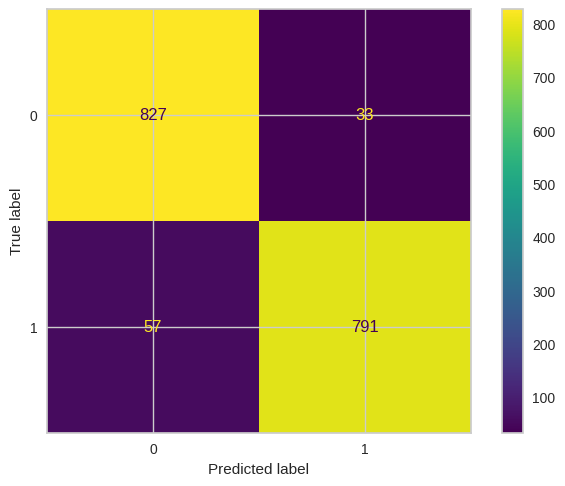

In [ ]:
## Retrain model with selected features
# build model
mlp2layers_perm_embed = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_perm_embed.fit(X_train_perm_2layers_embed, y_train)

# predict with training data
mlp2layersPermEmbed_train_pred = mlp2layers_perm_embed.predict(X_train_perm_2layers_embed)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp2layersPermEmbed_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersPermEmbed_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersPermEmbed_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersPermEmbed_train_pred)))

## classification report for X_val_perm_2layers_embed predictions
# Predict with X_val_perm_2layers_embed
mlp2layers_permEmbed_pred = mlp2layers_perm_embed.predict(X_val_perm_2layers_embed)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_permEmbed_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_permEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_permEmbed_pred)
plt.show()

### Model Training with **three** hidden layers
* 83 selected features with permutation importance: ['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash', 'nb_www', 'https_token', 'ratio_digits_host', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'shortening_service', 'shortest_word_host', 'longest_words_raw', 'phish_hints', 'domain_in_brand', 'suspecious_tld', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extErrors', 'external_favicon', 'empty_title', 'domain_with_copyright', 'domain_age', 'web_traffic', 'google_index', 'page_rank', '353', '359', '366', '371', '372', '373', '374', '375', '377', '379', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423']


* Columns with numerical features above are the compressed feature representations by the encoder in our EDA.


#### Feature Importance Selection

In [ ]:
# Compute permutation importance
results_3layers_embed = permutation_importance(mlp3layers_embed, X_train_embedded, y_train, n_repeats=10, random_state=42)

# Display feature importance
for i in results_3layers_embed.importances_mean.argsort()[::-1]:
    feature_name = X_train_embedded.columns[i]
    print(f"Feature {i} ({feature_name}): {results_3layers_embed.importances_mean[i]:.3f} +/- {results_3layers_embed.importances_std[i]:.3f}")

Feature 487 (411): 0.093 +/- 0.002
Feature 491 (415): 0.063 +/- 0.002
Feature 495 (419): 0.060 +/- 0.001
Feature 17 (nb_www): 0.058 +/- 0.002
Feature 480 (404): 0.053 +/- 0.001
Feature 483 (407): 0.050 +/- 0.001
Feature 75 (page_rank): 0.046 +/- 0.001
Feature 481 (405): 0.043 +/- 0.002
Feature 485 (409): 0.043 +/- 0.001
Feature 497 (421): 0.042 +/- 0.001
Feature 74 (google_index): 0.038 +/- 0.002
Feature 469 (393): 0.036 +/- 0.002
Feature 486 (410): 0.030 +/- 0.002
Feature 473 (397): 0.028 +/- 0.001
Feature 50 (nb_hyperlinks): 0.026 +/- 0.001
Feature 467 (391): 0.025 +/- 0.002
Feature 499 (423): 0.024 +/- 0.001
Feature 465 (389): 0.023 +/- 0.001
Feature 459 (383): 0.020 +/- 0.002
Feature 475 (399): 0.019 +/- 0.001
Feature 490 (414): 0.018 +/- 0.001
Feature 455 (379): 0.018 +/- 0.001
Feature 476 (400): 0.018 +/- 0.001
Feature 493 (417): 0.016 +/- 0.001
Feature 10 (nb_slash): 0.015 +/- 0.001
Feature 472 (396): 0.015 +/- 0.001
Feature 489 (413): 0.013 +/- 0.001
Feature 492 (416): 0.013 +/

In [ ]:
## Select features that are relatively significant (with mean importances > threshold), and to be used for training later

# Get index of selected features
perm_threshold = 0.002 # determined after several iterations and striking balance between good amount of features and interpretability and simplicity
selected_perm_features_embed_index_3layers = np.where(results_3layers_embed.importances_mean >= perm_threshold)[0]

# Get the names of the selected features
selected_perm_embed_features_3layers = [X_train_embedded.columns[i] for i in selected_perm_features_embed_index_3layers]
print('Number of Selected Features:' + str(len(selected_perm_embed_features_3layers)))
print(selected_perm_embed_features_3layers)

# Subset X datasets with selected features
X_train_perm_3layers_embed = X_train_embedded[selected_perm_embed_features_3layers]
X_val_perm_3layers_embed = X_val_embedded[selected_perm_embed_features_3layers]
X_test_perm_3layers_embed = X_test_embedded[selected_perm_embed_features_3layers]

Number of Selected Features:83
['length_hostname', 'ip', 'nb_dots', 'nb_hyphens', 'nb_at', 'nb_slash', 'nb_www', 'https_token', 'ratio_digits_host', 'tld_in_path', 'tld_in_subdomain', 'abnormal_subdomain', 'prefix_suffix', 'shortening_service', 'shortest_word_host', 'longest_words_raw', 'phish_hints', 'domain_in_brand', 'suspecious_tld', 'nb_hyperlinks', 'ratio_intHyperlinks', 'ratio_extHyperlinks', 'ratio_extErrors', 'external_favicon', 'empty_title', 'domain_with_copyright', 'domain_age', 'web_traffic', 'google_index', 'page_rank', '353', '359', '366', '371', '372', '373', '374', '375', '377', '379', '381', '382', '383', '384', '385', '386', '387', '388', '389', '390', '391', '392', '393', '394', '395', '396', '397', '398', '399', '400', '401', '402', '403', '404', '405', '406', '407', '408', '409', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '420', '421', '422', '423']


Accuracy on Training Data: 0.94
Precision on Training Data: 0.94
Recall on Training Data: 0.94
F1 score on Training Data: 0.94
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       860
           1       0.95      0.94      0.94       848

    accuracy                           0.94      1708
   macro avg       0.94      0.94      0.94      1708
weighted avg       0.94      0.94      0.94      1708

[[816  44]
 [ 52 796]]


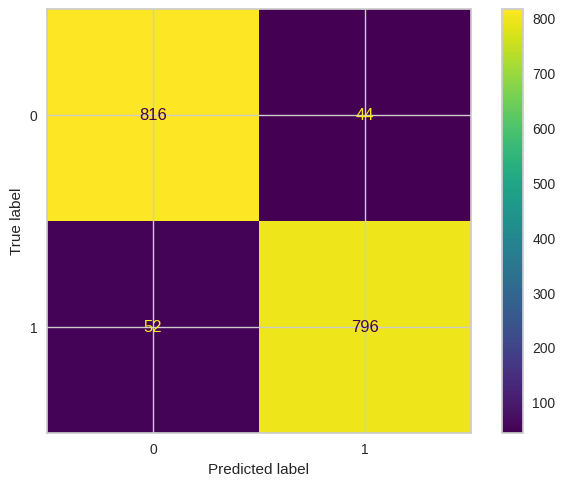

In [ ]:
## Retrain model with selected features
# build model
mlp3layers_perm_embed = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_perm_embed.fit(X_train_perm_3layers_embed, y_train)

# predict with training data
mlp3layersPermEmbed_train_pred = mlp3layers_perm_embed.predict(X_train_perm_3layers_embed)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersPermEmbed_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp3layersPermEmbed_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersPermEmbed_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersPermEmbed_train_pred)))


## classification report for X_val_perm_3layers_embed predictions
# Predict with X_val_perm_3layers_embed
mlp3layers_permEmbed_pred = mlp3layers_perm_embed.predict(X_val_perm_3layers_embed)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_permEmbed_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_permEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_permEmbed_pred)
plt.show()

## Hyperparameter Tuning (Permutation Importance)

### Tune `mlp2layers_permEmbed` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32), (32, 16), (16, 16), (16, 8)],
    'alpha': [0.0001, 0.001, 0.01],
    'activation': ['relu', 'logistic'],
    'max_iter': [200, 300, 400],
}

mlp2layers_permEmbed_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_permEmbed_tuned = RandomizedSearchCV(estimator=mlp2layers_permEmbed_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_permEmbed_tuned = mlp2layers_permEmbed_tuned.fit(X_train_perm_2layers_embed, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_permEmbed_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_permEmbed_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 400, 'hidden_layer_sizes': (64, 32), 'alpha': 0.001, 'activation': 'relu'}
CV:  0.9541213372171276


### Tune `mlp3layers_permEmbed` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (32, 16, 16), (16, 16, 8), (16, 8, 8), (32, 16, 8)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_permEmbed_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_permEmbed_tuned = RandomizedSearchCV(estimator=mlp3layers_permEmbed_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_permEmbed_tuned = mlp3layers_permEmbed_tuned.fit(X_train_perm_3layers_embed, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_permEmbed_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_permEmbed_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 400, 'hidden_layer_sizes': (64, 32, 16), 'alpha': 0.001, 'activation': 'relu'}
CV:  0.9515596755573984


## Prediction with Validation Data (**selected features** from Permutation Importance)

### Prediction with `mlp2layers_permEmbed_tuned` model

In [ ]:
# Predict with X_val_perm_2layers_embed
mlp2layersPermEmbed_pred = mlp2layers_permEmbed_tuned.predict(X_val_perm_2layers_embed)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersPermEmbed_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       860
           1       0.96      0.95      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708



[[825  35]
 [ 42 806]]


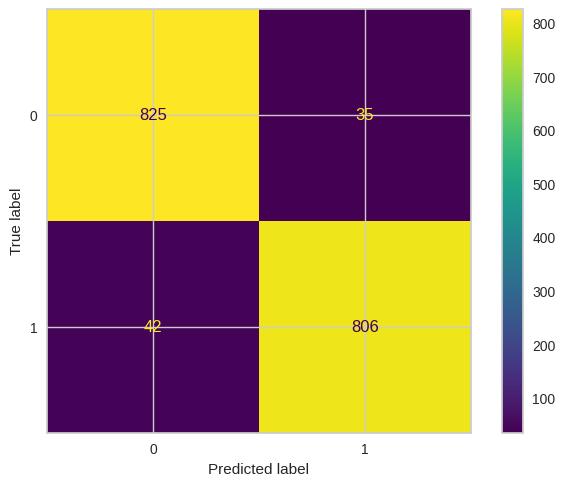

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersPermEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersPermEmbed_pred)
plt.show()

### Prediction with `mlp3layers_permEmbed_tuned` model

In [ ]:
# Predict with X_val_perm_3layers
mlp3layersPermEmbed_pred = mlp3layers_permEmbed_tuned.predict(X_val_perm_3layers_embed)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersPermEmbed_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       860
           1       0.96      0.94      0.95       848

    accuracy                           0.95      1708
   macro avg       0.95      0.95      0.95      1708
weighted avg       0.95      0.95      0.95      1708



[[828  32]
 [ 52 796]]


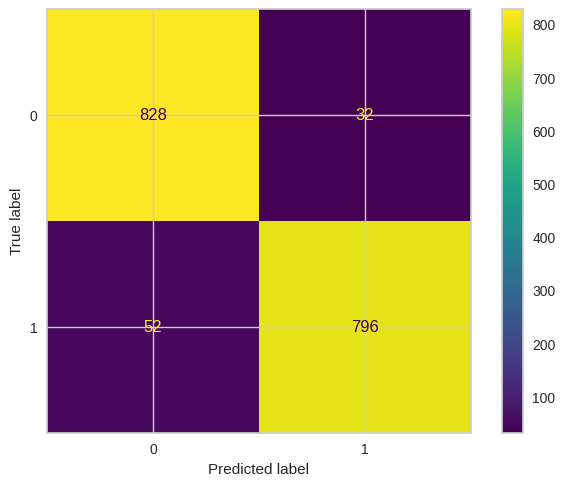

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersPermEmbed_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersPermEmbed_pred)
plt.show()

# Encodings

## Model Training with **Encodings**

### Model Training with **two** hidden layers

Accuracy score: 0.92
Precision on Training Data: 0.92
Recall on Training Data: 0.92
F1 score on Training Data: 0.92
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       860
           1       0.92      0.91      0.91       848

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708

[[796  64]
 [ 79 769]]


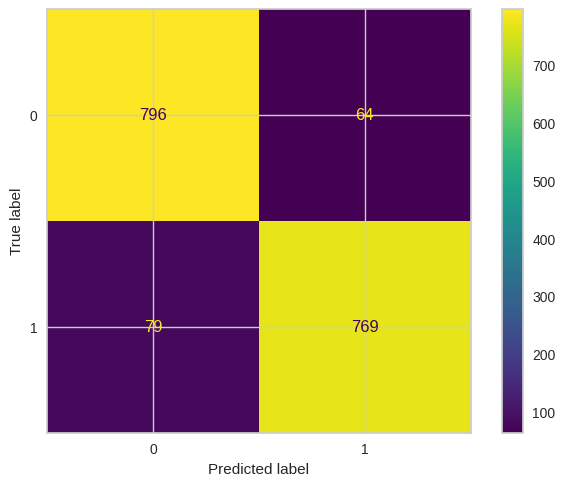

In [ ]:
# build model
mlp2layers_encoded = MLPClassifier(hidden_layer_sizes=(16, 8), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_encoded.fit(X_train_encoded, y_train)

# predict with training data
mlp2layersEncoded_train_pred = mlp2layers_encoded.predict(X_train_encoded)
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, mlp2layersEncoded_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersEncoded_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersEncoded_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersEncoded_train_pred)))

## classification report for X_val_encoded predictions
# Predict with X_val_encoded
mlp2layers_encoded_pred = mlp2layers_encoded.predict(X_val_encoded)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_encoded_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_encoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_encoded_pred)
plt.show()

### Model Training with **three** hidden layers

Accuracy on Training Data: 0.92
Precision score: 0.91
Recall on Training Data: 0.92
F1 score on Training Data: 0.92
              precision    recall  f1-score   support

           0       0.91      0.92      0.92       860
           1       0.92      0.91      0.91       848

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708

[[793  67]
 [ 77 771]]


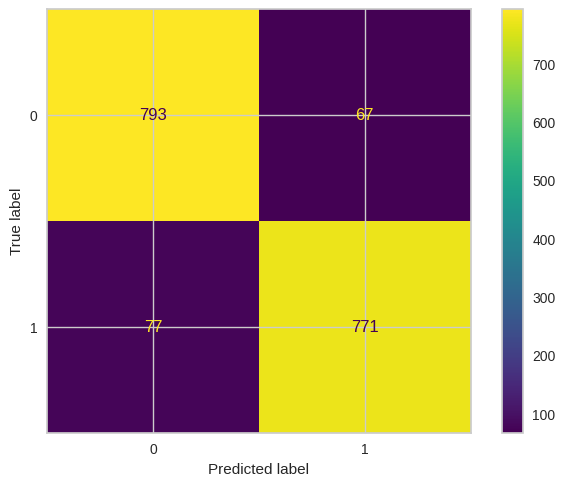

In [ ]:
# build model
mlp3layers_encoded = MLPClassifier(hidden_layer_sizes=(16, 8, 8), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_encoded.fit(X_train_encoded, y_train)

# predict with training data
mlp3layersEncoded_train_pred = mlp3layers_encoded.predict(X_train_encoded)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersEncoded_train_pred)))
print("Precision score: {:.2f}". format(precision_score(y_train, mlp3layersEncoded_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersEncoded_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersEncoded_train_pred)))

## classification report for X_val_encoded predictions
# Predict with X_val_encoded
mlp3layers_encoded_pred = mlp3layers_encoded.predict(X_val_encoded)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_encoded_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_encoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_encoded_pred)
plt.show()

## Hyperparameter Tuning (with **Encodings**)
> Tune models `mlp2layers_encoded` and `mlp3layers_encoded` with **Encodings**

### Tune `mlp2layers_encoded` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(16, 8), (64, 32), (32, 16), (32, 12), (16, 12), (64, 16)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp2layers_encoded_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_encoded_tuned = RandomizedSearchCV(estimator=mlp2layers_encoded_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_encoded_tuned = mlp2layers_encoded_tuned.fit(X_train_encoded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_encoded_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_encoded_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 400, 'hidden_layer_sizes': (64, 16), 'alpha': 0.001, 'activation': 'relu'}
CV:  0.9263445526465519


### Tune `mlp3layers_encoded` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (64, 32, 12), (32, 16, 8), (32, 20, 12), (64, 32, 8), (64, 16, 12)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_encoded_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_encoded_tuned = RandomizedSearchCV(estimator=mlp3layers_encoded_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_encoded_tuned = mlp3layers_encoded_tuned.fit(X_train_encoded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_encoded_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_encoded_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 300, 'hidden_layer_sizes': (64, 32, 16), 'alpha': 0.0001, 'activation': 'relu'}
CV:  0.9277135505579144


## Prediction with Validation Data (**encodings** features)

### Prediction with `mlp2layers_encoded_tuned` model

In [ ]:
# Predict with X_val_encoded
mlp2layersEncoded_pred = mlp2layers_encoded_tuned.predict(X_val_encoded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersEncoded_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.93      0.92       860
           1       0.93      0.91      0.92       848

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708



[[802  58]
 [ 73 775]]


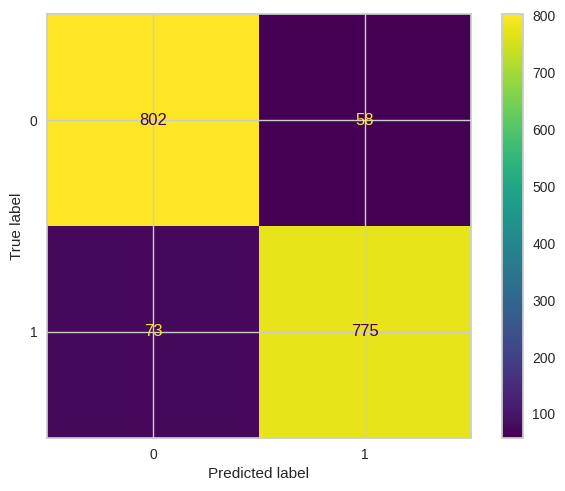

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersEncoded_pred)
plt.show()

### Prediction with `mlp3layers_encoded_tuned` model

In [ ]:
# Predict with X_val_encoded
mlp3layersEncoded_pred = mlp3layers_encoded_tuned.predict(X_val_encoded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersEncoded_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91       860
           1       0.92      0.88      0.90       848

    accuracy                           0.90      1708
   macro avg       0.90      0.90      0.90      1708
weighted avg       0.90      0.90      0.90      1708



[[794  66]
 [ 99 749]]


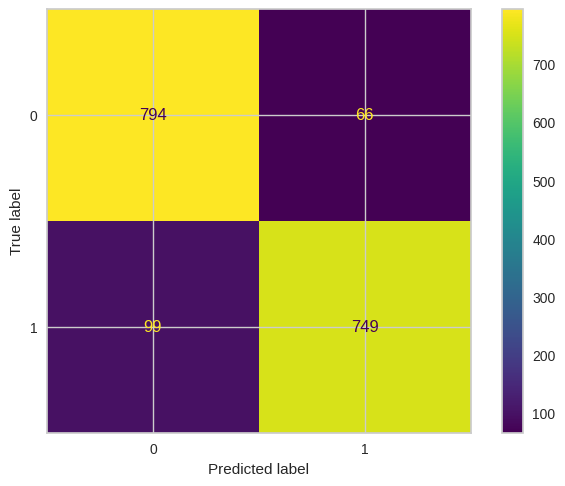

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersEncoded_pred)
plt.show()

# Embeddings + Encodings

## Model Training with **Embeddings + Encodings**

### Model Training with **two** hidden layers

Accuracy score: 0.92
Precision on Training Data: 0.93
Recall on Training Data: 0.92
F1 score on Training Data: 0.92
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       860
           1       0.94      0.90      0.92       848

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708

[[810  50]
 [ 85 763]]


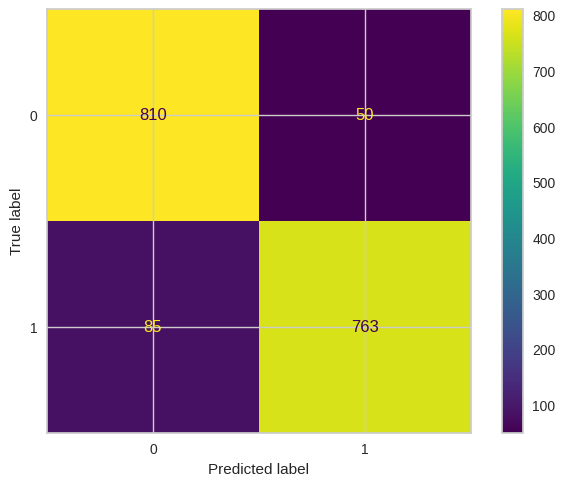

In [ ]:
# build model
mlp2layers_embedEncoded = MLPClassifier(hidden_layer_sizes=(32, 16), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp2layers_embedEncoded.fit(X_train_embeddings_encoded, y_train)

# predict with training data
mlp2layersEmbedEncoded_train_pred = mlp2layers_embedEncoded.predict(X_train_embeddings_encoded)
print("Accuracy score: {:.2f}".format(accuracy_score(y_train, mlp2layersEmbedEncoded_train_pred)))
print("Precision on Training Data: {:.2f}". format(precision_score(y_train, mlp2layersEmbedEncoded_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp2layersEmbedEncoded_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp2layersEmbedEncoded_train_pred)))

## classification report for X_val_embeddings_encoded predictions
# Predict with X_val_embeddings_encoded
mlp2layers_embedEncoded_pred = mlp2layers_embedEncoded.predict(X_val_embeddings_encoded)

# Using metric classification_report function
print(classification_report(y_val, mlp2layers_embedEncoded_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp2layers_embedEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layers_embedEncoded_pred)
plt.show()

### Model Training with **three** hidden layers

Accuracy on Training Data: 0.92
Precision score: 0.92
Recall on Training Data: 0.93
F1 score on Training Data: 0.92
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       860
           1       0.92      0.91      0.92       848

    accuracy                           0.92      1708
   macro avg       0.92      0.92      0.92      1708
weighted avg       0.92      0.92      0.92      1708

[[797  63]
 [ 74 774]]


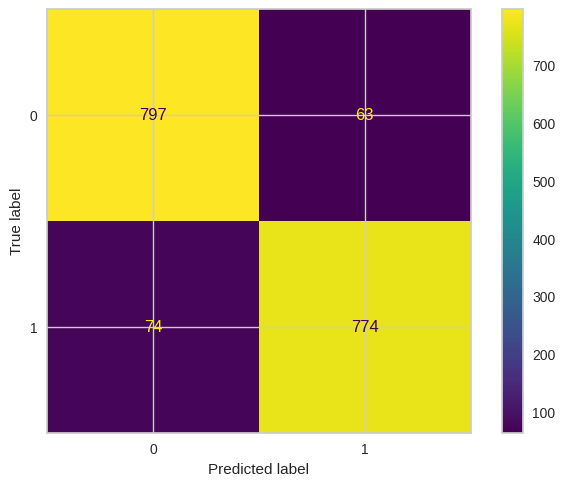

In [ ]:
# build model
mlp3layers_embedEncoded = MLPClassifier(hidden_layer_sizes=(32, 16, 8), activation='logistic', solver='adam',
                    alpha=0.0001, random_state=42, max_iter=300)

# fit model with training data
mlp3layers_embedEncoded.fit(X_train_embeddings_encoded, y_train)

# predict with training data
mlp3layersEncoded_train_pred = mlp3layers_embedEncoded.predict(X_train_embeddings_encoded)
print("Accuracy on Training Data: {:.2f}".format(accuracy_score(y_train, mlp3layersEncoded_train_pred)))
print("Precision score: {:.2f}". format(precision_score(y_train, mlp3layersEncoded_train_pred)))
print("Recall on Training Data: {:.2f}". format(recall_score(y_train, mlp3layersEncoded_train_pred)))
print("F1 score on Training Data: {:.2f}". format(f1_score(y_train, mlp3layersEncoded_train_pred)))

## classification report for X_val_embeddings_encoded predictions
# Predict with X_val_embeddings_encoded
mlp3layers_embedEncoded_pred = mlp3layers_embedEncoded.predict(X_val_embeddings_encoded)

# Using metric classification_report function
print(classification_report(y_val, mlp3layers_embedEncoded_pred, labels=[0, 1]))

# Confusion Matrix
print(confusion_matrix(y_val, mlp3layers_embedEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layers_embedEncoded_pred)
plt.show()

## Hyperparameter Tuning (with **Embeddings + Encodings**)
> Tune models `mlp2layers_embedEncoded` and `mlp3layers_embedEncoded`

### Tune `mlp2layers_embedEncoded` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(32, 16), (32, 22), (22, 16), (64, 32), (64, 22), (22, 22)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp2layers_embedEncoded_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp2layers_embedEncoded_tuned = RandomizedSearchCV(estimator=mlp2layers_embedEncoded_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp2layers_embedEncoded_tuned = mlp2layers_embedEncoded_tuned.fit(X_train_embeddings_encoded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp2layers_embedEncoded_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp2layers_embedEncoded_tuned.best_score_)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters:  {'max_iter': 200, 'hidden_layer_sizes': (64, 22), 'alpha': 0.0001, 'activation': 'relu'}
CV:  0.9273822173309302


### Tune `mlp2layers_embedEncoded` model

In [ ]:
# Tuning for model with all features
param_grid = {
    'hidden_layer_sizes': [(64, 32, 16), (64, 32, 22), (32, 22, 16), (32, 16, 8), (64, 22, 16), (32, 22, 22)],
    'activation': ['relu', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [200, 300, 400],
}

mlp3layers_embedEncoded_2 = MLPClassifier(solver='adam', random_state=42, early_stopping=True)
mlp3layers_embedEncoded_tuned = RandomizedSearchCV(estimator=mlp3layers_embedEncoded_2, param_distributions=param_grid, cv=5, n_iter=50,
                                verbose=2, n_jobs=-1, scoring='f1')

mlp3layers_embedEncoded_tuned = mlp3layers_embedEncoded_tuned.fit(X_train_embeddings_encoded, y_train)

# get the best parameters from random search
print("Best parameters: ", mlp3layers_embedEncoded_tuned.best_params_)
# get evaluation metrics of cv scores of best parameters
print("CV: ", mlp3layers_embedEncoded_tuned.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters:  {'max_iter': 400, 'hidden_layer_sizes': (64, 22, 16), 'alpha': 0.01, 'activation': 'relu'}
CV:  0.9337183471187667


## Prediction with Validation Data (**embeddings + encodings** features)

### Prediction with `mlp2layers_embedEncoded_tuned` model

In [ ]:
# Predict with X_val_embeddings_encoded
mlp2layersEmbedEncoded_pred = mlp2layers_embedEncoded_tuned.predict(X_val_embeddings_encoded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp2layersEmbedEncoded_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.91      0.91      0.91       860
           1       0.91      0.91      0.91       848

    accuracy                           0.91      1708
   macro avg       0.91      0.91      0.91      1708
weighted avg       0.91      0.91      0.91      1708



[[783  77]
 [ 73 775]]


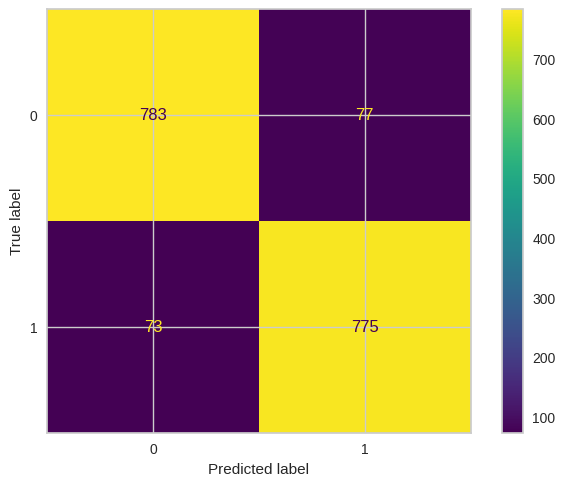

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp2layersEmbedEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp2layersEmbedEncoded_pred)
plt.show()

### Prediction with `mlp3layers_embedEncoded_tuned` model

In [ ]:
# Predict with X_val_embeddings_encoded
mlp3layersEmbedEncoded_pred = mlp3layers_embedEncoded_tuned.predict(X_val_embeddings_encoded)

In [ ]:
# Using metric classification_report function
print(classification_report(y_val, mlp3layersEmbedEncoded_pred, labels=[0, 1]))

              precision    recall  f1-score   support

           0       0.92      0.93      0.93       860
           1       0.93      0.92      0.92       848

    accuracy                           0.93      1708
   macro avg       0.93      0.93      0.93      1708
weighted avg       0.93      0.93      0.93      1708



[[800  60]
 [ 68 780]]


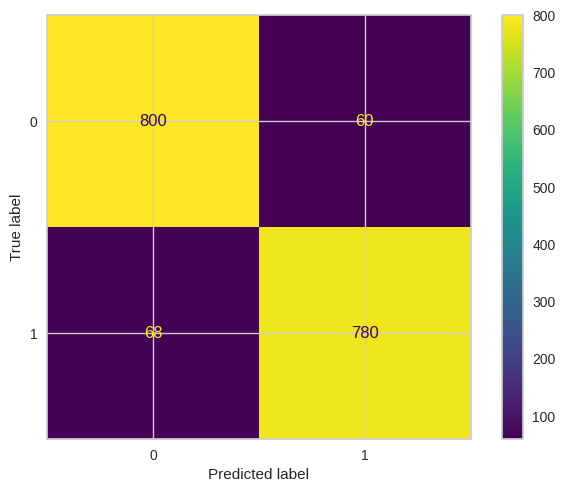

In [ ]:
# Confusion Matrix
print(confusion_matrix(y_val, mlp3layersEmbedEncoded_pred, labels=[0, 1]))

disp = ConfusionMatrixDisplay.from_predictions(y_val, mlp3layersEmbedEncoded_pred)
plt.show()